<h1>Part 1: Simple Bayes</h1>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# c = Cloudy, r = rain
prob_c_given_r = .5
prob_c = .4
prob_r = .1 # 3 days out of 30 = 10%
prob_r_given_c = prob_r * prob_c_given_r / prob_c
print("Probability of rain on a cloudy day:",prob_r_given_c)

Probability of rain on a cloudy day: 0.125


<h1>Part 2: Implementation</h1>

In [2]:
import pandas as pd
import numpy as np

# Read in data from weather1.csv
df = pd.read_csv('weather1.csv')
df

,Day,Outlook,Temperature,Humidity,Wind,Play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,No
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [3]:
# Encode categorical data
from sklearn.preprocessing import LabelEncoder
for i in ["Outlook","Temperature","Humidity","Wind","Play"]:
    encoder = LabelEncoder()
    df[i] = encoder.fit_transform(df[i])    
df

,Day,Outlook,Temperature,Humidity,Wind,Play
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,0
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1
5,D6,1,0,1,0,0
6,D7,0,0,1,0,1
7,D8,2,2,0,1,0
8,D9,2,0,1,1,1
9,D10,1,2,1,1,1


In [4]:
# Split out data and target
data = df.iloc[:,1:-1]
print(data)
target = df.iloc[:,-1:]
print(target)

    Outlook  Temperature  Humidity  Wind
0         2            1         0     1
1         2            1         0     0
2         0            1         0     1
3         1            2         0     1
4         1            0         1     1
5         1            0         1     0
6         0            0         1     0
7         2            2         0     1
8         2            0         1     1
9         1            2         1     1
10        2            2         1     0
11        0            2         0     0
12        0            1         1     1
13        1            2         0     0
    Play
0      0
1      0
2      0
3      1
4      1
5      0
6      1
7      0
8      1
9      1
10     1
11     1
12     0
13     0


In [5]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
classifier = GaussianNB()
model = classifier.fit(data, target)
prediction = ["Overcast","Mild","Normal","Strong"]
prediction = [[0,2,1,0],] # Manually converted
print("Bayes predicts:",model.predict(prediction))
print("Probabilities for no/yes:",model.predict_proba(prediction))
print("Prior probabilites from dataset:",model.class_prior_)

Bayes predicts: [1]
Probabilities for no/yes: [[0.2140775 0.7859225]]
Prior probabilites from dataset: [0.5 0.5]


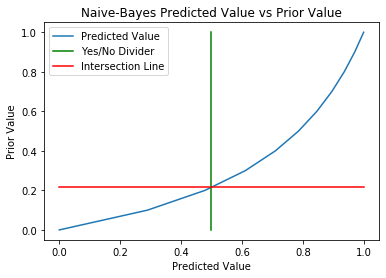

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
predict_yes_probabilities = []
priori_probabilities = []
for i in range(11):
    classifier = GaussianNB(priors=[1-i/10,i/10])
    model = classifier.fit(data,target)
    prediction = [[0,2,1,0],] # Manually converted
    
    predict_val = model.predict(prediction)
    predict_prob = model.predict_proba(prediction)
    predict_prior = model.class_prior_
    
    predict_yes_probabilities.append(predict_prob[0][1])
    priori_probabilities.append(predict_prior[1])

half_array = []
for i in range(11):
        half_array.append(0.5)
plt.plot(predict_yes_probabilities, priori_probabilities, label="Predicted Value")
plt.plot(half_array,priori_probabilities, color="green", label="Yes/No Divider")
plt.plot([0,1],[0.215,0.215],color="red", label="Intersection Line")
plt.title("Naive-Bayes Predicted Value vs Prior Value")
plt.xlabel("Predicted Value")
plt.ylabel("Prior Value")
plt.legend()
plt.show()

<p>As we can see above, the predicted value changes when the prior value is approximately 0.215.</p>